In [1]:
# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\84sat\OneDrive\Desktop\CAREER FOUNDRY\4 Python Practice\1 Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\84sat\\OneDrive\\Desktop\\CAREER FOUNDRY\\4 Python Practice\\1 Instacart Basket Analysis'

In [4]:
# importing ords_prods_cust file

In [5]:
ords_prods_cust_merge = pd.read_pickle(os.path.join(path , '02 Data' , 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [6]:
ords_prods_cust_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,n_dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both


In [7]:
# creating random subsets

In [8]:
# Create a list holding True/False values to the test np.random,rand() <= 0.7

In [9]:
 np.random.seed(4)
    
 dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7


In [10]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [11]:
# Saving 70% of the sample in big dataframe

In [12]:
 big = ords_prods_cust_merge[dev]

In [13]:
# Saving 30% of the sample in small dataframe

In [14]:

 small = ords_prods_cust_merge[~dev]


In [15]:
len(ords_prods_cust_merge)

32404859

In [16]:
len(big) + len(small)

32404859

In [17]:
# Creating Bar chart using Sample

Text(0, 0.5, 'Order frequency')

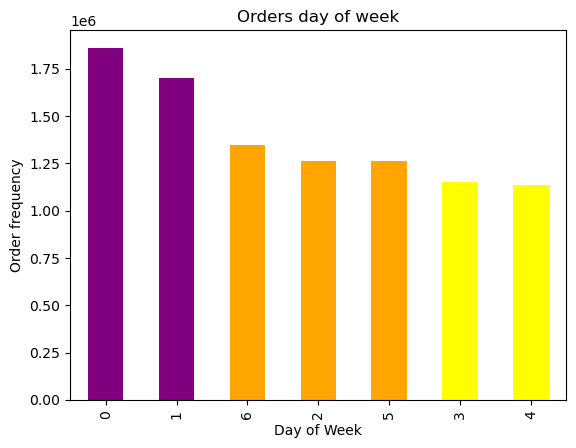

In [19]:
bar = small['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'purple', 'orange','orange','orange', 'yellow','yellow'])

bar.set_title('Orders day of week')
bar.set_xlabel('Day of Week')
bar.set_ylabel('Order frequency')




In [17]:
# Exporting Bar Chart

In [20]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow1.png'))

In [20]:
# Creating Histogram of prices

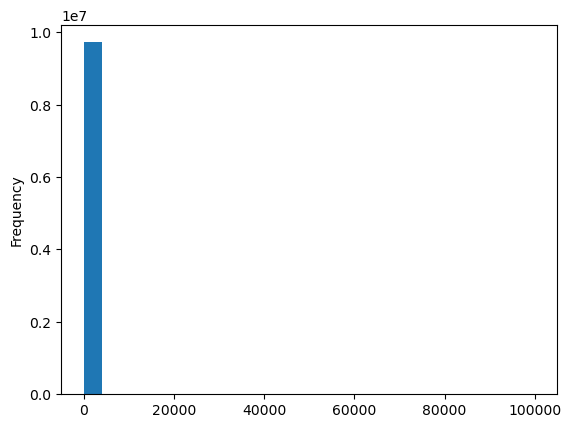

In [21]:
histogram = small['prices'].plot.hist(bins = 25)

In [22]:
small['prices'].describe()

count    9.721098e+06
mean     1.196327e+01
std      4.923865e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [26]:
small['prices'].mean()

11.963267626683775

In [24]:
small['prices'].median()

7.4

In [25]:
small['prices'].max()

99999.0

In [27]:
# Creating scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

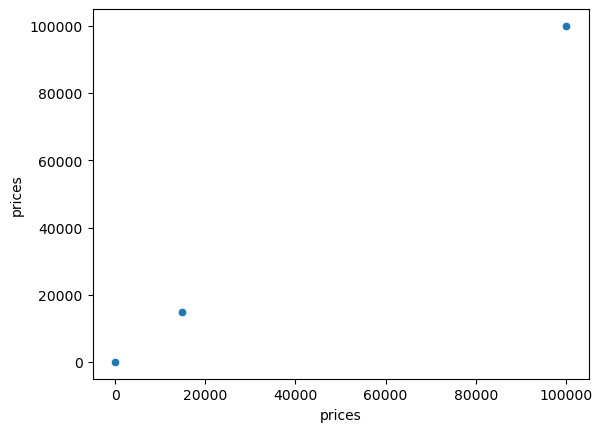

In [28]:
sns.scatterplot(x = 'prices', y = 'prices',data = small)

In [29]:
# Turning outliers to NaN

In [30]:
small.loc[small['prices'] >100 , 'prices']= np.nan

In [31]:
small['prices'].max()

25.0

In [32]:
#  plotting Histogram

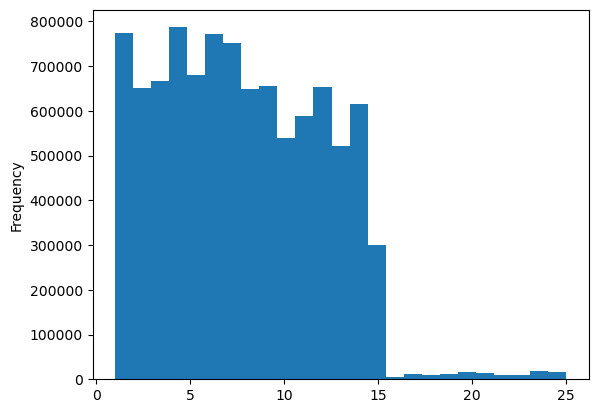

In [33]:
hist = small['prices'].plot.hist(bins = 25)

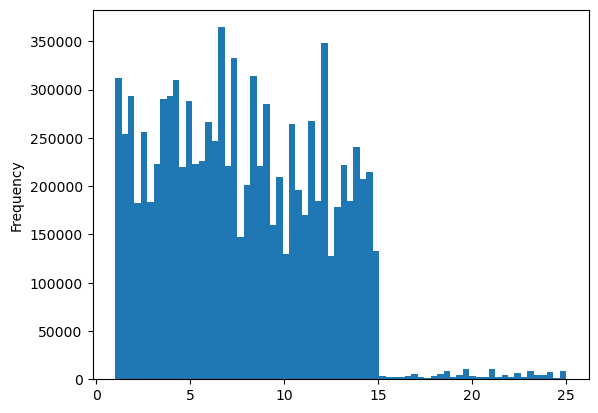

In [34]:
hist_2 = small['prices'].plot.hist(bins = 70)

In [35]:
 # Exporting Histogram

In [36]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

In [37]:
# Creating line chart

In [38]:
# reducing sample to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.

In [30]:
df_3 = small[['orders_day_of_week','prices']]

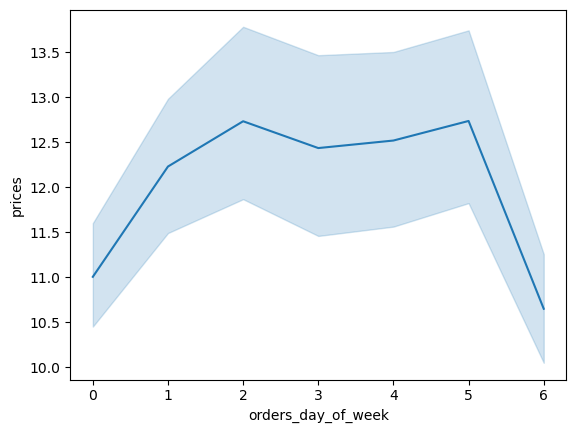

In [31]:
line1 = sns.lineplot(data = df_3, x = 'orders_day_of_week',y = 'prices')

In [27]:
# line.figure.savefig(os.path.join(path, '04 Analysis' ,'Visualizations' , 'line_price_odw.png'))

NameError: name 'line' is not defined

In [41]:
# Question 3:  Create a histogram of the “order_hour_of_day” column.

Text(0, 0.5, 'Order frequency')

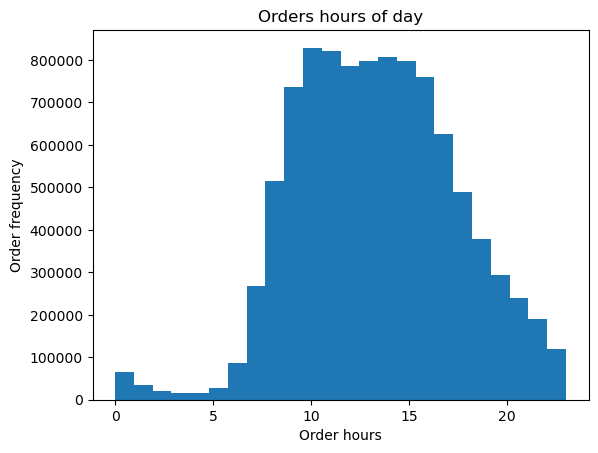

In [21]:
hist_3 =  small['order_hour_of_day'].plot.hist(bins = 24)

hist_3.set_title('Orders hours of day')
hist_3.set_xlabel('Order hours')
hist_3.set_ylabel('Order frequency')




In [43]:
# Exporting order_hours_of_the_day Histogram

In [22]:
hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hours_of_day1.png'))

In [ ]:
# by looking at Histogram highest orders are in between 10 am - 4pm

In [45]:
# Question 4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

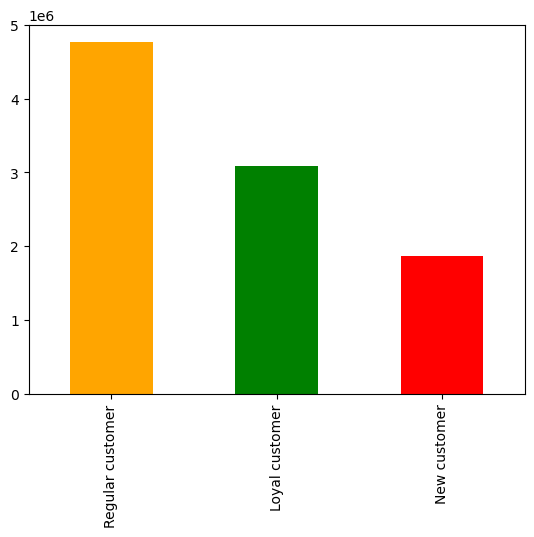

In [48]:
loyality_bar = small['loyalty_flag'].value_counts().plot.bar(color =['orange', 'green','red'])

In [49]:
# export Loyalty_customer bar chart

In [51]:
loyality_bar.figure.savefig(os.path.join(path, '04 Analysis' ,'Visualizations' , 'loyalty_bar.png'))

In [ ]:
# Question 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [ ]:
# reducing sample to only those columns necessary for the chart, namely “prices” and “orders_hours_of_day.

In [23]:
df_odr_hour_day = small[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Spendind per Hour')

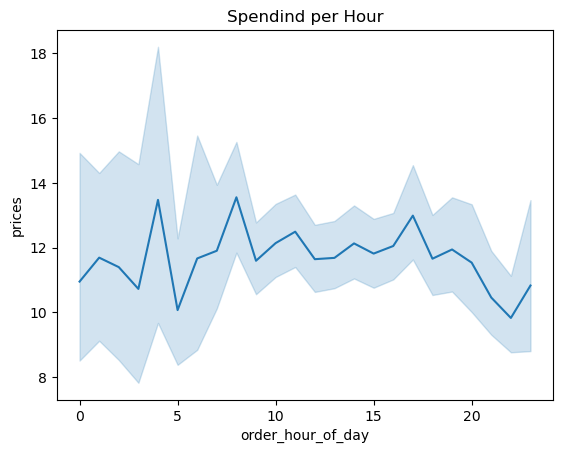

In [24]:
line_price_ohd = sns.lineplot(data = df_odr_hour_day, x = 'order_hour_of_day',y = 'prices')

line_price_ohd.set_title('Spending per Hour')

In [25]:
# Export price and order_hour_of_day Line chart

In [26]:
line_price_ohd.figure.savefig(os.path.join(path, '04 Analysis' ,'Visualizations' , 'line_price_ohd1.png'))

In [ ]:
# Question 6: determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [57]:
# reducing sample to only those columns necessary for the chart, namely “age” and “number of dependents.

In [60]:
df_age_nod = small[['age','n_dependants']]

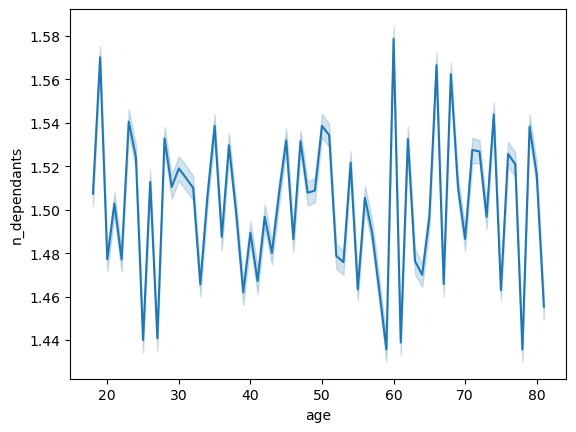

In [61]:
 line_age_nod = sns.lineplot(data = df_age_nod, x = 'age',y = 'n_dependants')

In [62]:
# Question 7: Connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [63]:
# reducing sample to only those columns necessary for the chart, namely “age” and income.

In [68]:
df_age_income = small[['age' , 'income']]

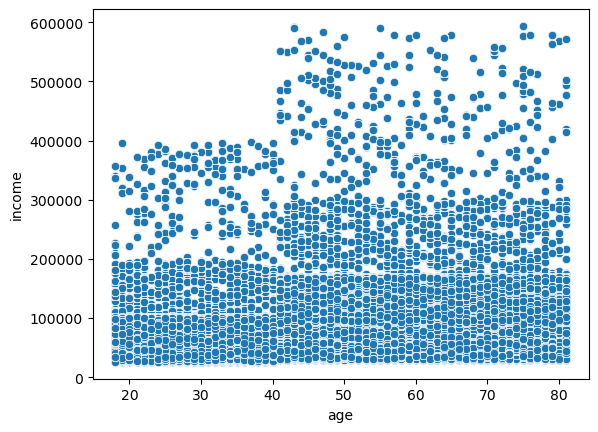

In [69]:
sctr_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_age_income)


In [70]:
# most of the income is in between 0 to 200 k, fewer people from 40 to 80 ages are erning 400k to 600k

In [71]:
#Export Scatter chart

In [72]:
sctr_age_income.figure.savefig(os.path.join(path, '04 Analysis' ,'Visualizations' , 'sctr_age_income.png'))